In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
def y(x, W, M):
  Y = np.array(W[i] * (x ** i) for i in range(M+1))
  return Y.sum()

def Train(x, t, M):
  N = len(t)
  A = np.zeros((N, M))
  for i in range(N):
    for j in range(M):
      A[i,j] = (x[i] ** j)
  A_inv = np.linalg.pinv(A)
  return np.dot(A_inv, t)

def Predict(W,X):
  M = len(W)
  N = len(X)
  Y = np.zeros((N))
  for i in range(N):
    Y[i] = np.array([W[j] * (X[i] ** j) for j in range(M)]).sum()
  
  return Y

def split_train_test(x, num):
  idx = np.random.randint(0,2,size=num)
  X_train = x[idx]
  X_test = x[idx]
  Y_train = np.sin(2 * np.pi * X_train) + np.random.normal(0, 1, len(X_train))
  Y_test = np.sin(2 * np.pi * X_test) + np.random.normal(0, 1, len(X_test))
  return X_train, Y_train, X_test, Y_test

In [93]:
num = 20
x = np.random.rand(20)
print(np.sort(x))
x = np.sort(x)
X = np.linspace(0,1,100)

[1.46315031e-05 7.65722634e-02 1.59396707e-01 1.62968457e-01
 2.96937695e-01 3.60595677e-01 4.04862788e-01 4.87715541e-01
 5.39956817e-01 5.90941789e-01 6.69050357e-01 6.84389323e-01
 7.07982586e-01 7.47383905e-01 7.76153915e-01 7.85476852e-01
 8.63018081e-01 9.34535181e-01 9.64807839e-01 9.72624953e-01]


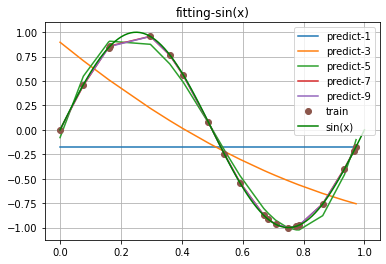

In [96]:
for i in [1,3,5,7,9]:
  W = Train(x, np.sin(2*np.pi*x), i)

  Y_predict = Predict(W,x)

  plt.plot(x, Y_predict,label=f'predict-{i}')

plt.plot(x, np.sin(2*np.pi*x), 'o', label="train")
plt.plot(X,np.sin(2*X*np.pi), 'g-', label='sin(x)')
#plt.xlim(0,1)
#plt.ylim(-1,1)
plt.legend()
plt.grid()
plt.title("fitting-sin(x)")
plt.show()